In [ ]:
'''
Problem Statement - Build the Image classification model by dividing the model into following 4 stages:
a. Loading and preprocessing the image data
b. Defining the model’s architecture
c. Training the model
d. Estimating the model’s performance
'''

In [ ]:
# IMPORT THE REQUIRED PACKAGES
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# a. LOADING AND PRE-PROCESSING THE IMAGE DATA
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
input_shape = (28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print("Data Type of x_train: ", x_train.dtype)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Data Type of x_train:  float32


In [ ]:
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print("Shape of Training: ", x_train.shape)
print("Shape of Testing", x_test.shape)


Shape of Training:  (60000, 28, 28, 1)
Shape of Testing (10000, 28, 28, 1)


In [ ]:
# b. DEFINING THE MODEL'S ARCHITECTURE ->
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(200,activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation = "softmax"))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4732)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       946,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 948,890 (3.62 MB)

 Trainable params: 948,890 (3.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# c. TRAINING THE MODEL ->
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train, epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.1065 - loss: 2.3035
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.1115 - loss: 2.3016


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1160 - loss: 2.3011
Loss=2.301
Accuracy=0.113


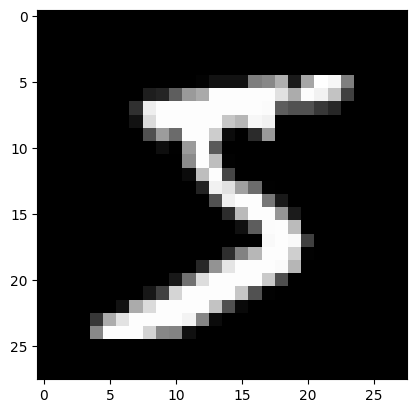

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted class: 1


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(1, 28, 28, 1))',)
  warnings.warn(msg)


In [ ]:
# d. ESTIMATING THE MODEL'S PERFORMANCE ->
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

# Showing image at position[] from dataset:
image = x_train[0]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

# Predicting the class of image:
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
predict_model = model.predict([image])
print("Predicted class: {}".format(np.argmax(predict_model)))